In [22]:
import numpy as np
from pylab import mpl, plt

Plot styling


In [23]:
style = 'seaborn-v0_8'
plt.style.use(style)
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

Plotting Function


In [24]:
def create_plot(x,y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    
    plt.legend(loc = 0)

In [25]:
import scipy.interpolate as spi

Values used for the plotting and the calculations.


In [26]:
def f(x):
    return np.sin(x) + 0.5 * x

x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

Interpolation step


In [27]:
ipo = spi.splrep(x, f(x), k=1) # Implement a linear spline interpolation

In [28]:
iy = spi.splev(x, ipo) # Derive interpolated values

Regression now leads to a (near) perfect fit


In [29]:
np.allclose(f(x), iy) # Checks whether the interpolated values are close (enough) to the function values

True

Plotting the results


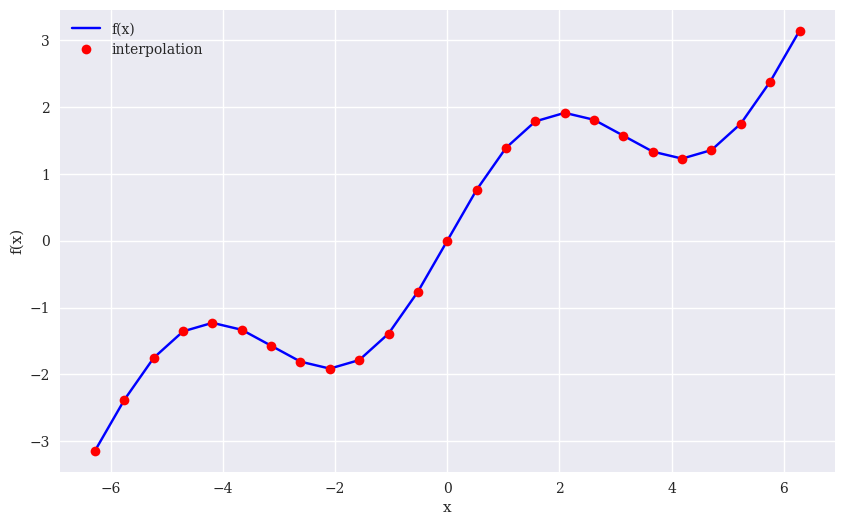

In [30]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],['f(x)', 'interpolation'], ['x', 'f(x)'])

Spline interpolation is often used in finance to generate estimates
for dependent values of independent data points not included in the original observations.


For certain applications this might not be precise enough


In addition, it is evident that the function is not continuously differentiable at the original data points—another drawback:


In [31]:
# Smaller interval with more points
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

Plot the linear splines interpolation using the subset of data


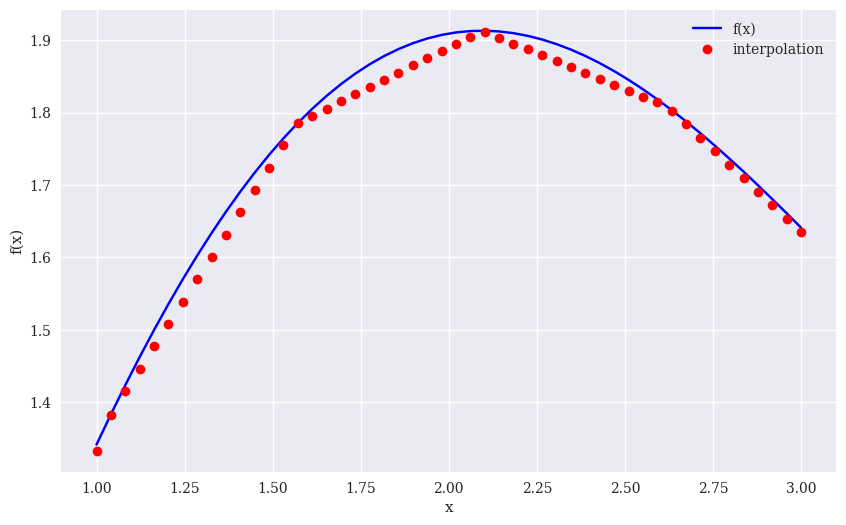

In [32]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
['f(x)', 'interpolation'], ['x', 'f(x)'])

Using cubic splines improves results considerably


In [33]:
ipo = spi.splrep(x, f(x), k=3) # Cubic splines on comple data seta
iyd = spi.splev(xd, ipo) # Results applied to smaller interval 

Still not perfect


In [34]:
np.allclose(f(xd), iyd)

False

In [35]:
np.mean((f(xd) - iyd) ** 2)

1.1349319851436252e-08

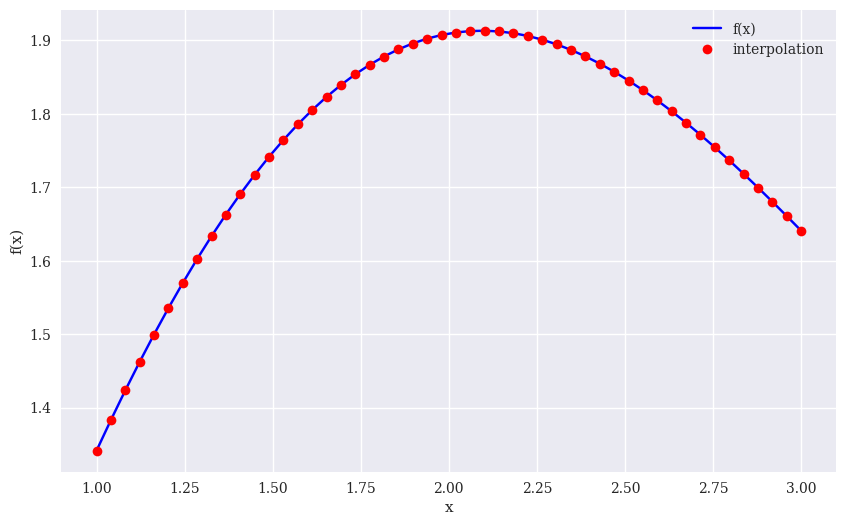

In [36]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
['f(x)', 'interpolation'], ['x', 'f(x)'])